# KNN Classifier

* In this notebook we are going to classify dog-cat and pandas images. KNN(k-Nearest Neighbors Algorithm) is not a deep learning algoritm, and actually it is not learn anything. But it is really easy to understand and not requires lots of energy to implement. So, lets start.

##### To get able to use this notebook,you have to download all images dataset. Of course you can use your private cat-dog-panda images too, but be sure that your images file format is i.e for cats should like this: cats_00001.jpg, cats_00002.jpg ....

##### and folder format is:
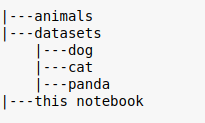

##### If not, you probably can not use codes in this notebook without making changes.

### Dataset is here: 

## Basic Image Preprocessor

In [1]:
import cv2 

class SimplePreprocessor:
    def __init__(self, width, height, inter=cv2.INTER_AREA):
        #store the target image width, height and interpolation
        #method used when resizing
        self.width = width
        self.height = height
        self.inter = inter
        
    def preprocess(self, image):
         #resize the image to a fixed size, igroring the aspect
         # ration
        return cv2.resize(image, (self.width, self.height),
                         interpolation=self.inter)

## Building Image Loader

In [2]:
import numpy as np
import cv2
import os

class SimpleDatasetLoader:
    def __init__(self, preprocessors=None):
        # store the image preprocessor
        self.preprocessors = preprocessors
        
        # if the preprocessors are None, initialize them
        # as an empty list
        if self.preprocessors is None:
            self.preprocessors = []
    
    def load(self, imagePaths, verbose=-1):
        # initialize the list of features and labels
        data = []
        labels = []
        
        # loop over the input images
        for (i, imagePath) in enumerate(imagePaths):
            # load the image and extract the class label assuming
            # that our path has the following format:
            # /path/to/dataset/{class}/{image}.jpg
            image = cv2.imread(imagePath)
            label = imagePath.split(os.path.sep)[-2]
            
            # check to see if our preprocessors are not None
            if self.preprocessors is not None:
                # loop over the preprocessors and apply each to
                # the image
                for p in self.preprocessors:
                    image = p.preprocess(image)
            
            # treat our processed image as a "feature vector"
            # by updating the data list followed by the labels
            data.append(image)
            labels.append(label)
            
            # show an update every 'verbose' images
            if verbose > 0 and i > 0 and (i + 1) % verbose == 0:
                print("[INFO] processed {}/{}".format(i + 1,
                     len(imagePath)))
        #return a tuple of the data and labels
        return (np.array(data), np.array(labels))

## k-NN: A Simple Classifier

* The k-Nearest Neighbor classifier is by far the most simple machine learning and image classification algorithm.
In fact, it’s so simple that it doesn’t actually “learn” anything. Instead, this algorithm directly relies on the distance between feature vectors (which in our case, are the raw
RGB pixel intensities of the images).

In [4]:
# import the necessary packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths


# grab the list of images that we’ll be describing
print("[INFO] loading images...")
imagePaths = list(paths.list_images("/media/data/E81A6D761A6D4324/UBUNTU 20.04/Ai/datasets/animals/"))

# initialize the image preprocessor, load the dataset from disk,
# and reshape the data matrix
sp = SimplePreprocessor(32, 32)
sdl = SimpleDatasetLoader(preprocessors=[sp])
(data, labels) = sdl.load(imagePaths, verbose=500)
data = data.reshape((data.shape[0], 3072))

# show some information on memory consumption of the images
print("[INFO] features matrix: {:.1f}MB".format(
data.nbytes / (1024 * 1000.0)))

# encode the labels as integers
le = LabelEncoder()
labels = le.fit_transform(labels)

# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels,
    test_size=0.25, random_state=42)

# train and evaluate a k-NN classifier on the raw pixel intensities
print("[INFO] evaluating k-NN classifier...")
model = KNeighborsClassifier(n_neighbors=3)
model.fit(trainX, trainY)
print(classification_report(testY, model.predict(testX),
    target_names=le.classes_))

[INFO] loading images...
[INFO] processed 500/81
[INFO] processed 1000/81
[INFO] processed 1500/81
[INFO] processed 2000/81
[INFO] processed 2500/83
[INFO] processed 3000/83
[INFO] features matrix: 9.0MB
[INFO] evaluating k-NN classifier...
              precision    recall  f1-score   support

        cats       0.39      0.56      0.46       262
        dogs       0.40      0.46      0.43       249
       panda       0.92      0.32      0.48       239

    accuracy                           0.45       750
   macro avg       0.57      0.45      0.45       750
weighted avg       0.56      0.45      0.45       750



* This notebook based on Adrian Rosebrock's Deep Learning for Computer Vision with Python - Starter Bundle book.To more information please visit his website (https://www.pyimagesearch.com/ ).
